In [74]:
# ライブラリーのインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
import shap
import re

In [64]:
# ファイルパス
file_path_uilog = './ui_log_features_main_expt.csv'
file_path_questionnaire = './questionnaire.csv'

# CSVファイルの読み込み
data_uilog = pd.read_csv(file_path_uilog)
data_uilog

,Subject,File,Task,Total_Mouse_Distance,Avg_Mouse_Speed,Max_Mouse_Speed,Total_Time,Mouse_Sensible_Pause_Count,Avg_Mouse_Sensible_Pause_Time,Avg_Mouse_Accel,...,Repeated_Mouse_Patterns_Count_proximity_threshold_50,Repeated_Mouse_Patterns_Count_proximity_threshold_60,Repeated_Mouse_Patterns_Count_proximity_threshold_70,Repeated_Mouse_Patterns_Count_proximity_threshold_80,Repeated_Mouse_Patterns_Count_proximity_threshold_90,Repeated_Mouse_Patterns_Count_proximity_threshold_100,Avg_Mouse_Episode_Time,Mouse_Episode_Time_Stddev,Interaction_Density_Window,Interaction_Density_Over_Task
0,5,ui-log_金_13-12-2024_12-58-44.txt,training,23639.86,293.97,137615.41,94.590,51,1.3731,66728.55,...,0,0,0,0,0,0,0.4641,734.39,22.87,22.87
1,5,ui-log_金_13-12-2024_13-03-42.txt,task_01,19889.40,147.05,8824.83,186.385,128,0.9946,17595.37,...,44,62,66,78,104,132,0.4433,534.16,24.37,24.37
2,5,ui-log_金_13-12-2024_13-08-05.txt,task_02,19384.50,307.60,9351.42,90.131,77,0.6310,22456.97,...,0,0,0,0,0,0,0.5317,536.10,40.61,40.61
3,5,ui-log_金_13-12-2024_13-10-01.txt,task_03,19661.07,345.82,24331.05,77.990,58,0.7316,29594.92,...,2,2,2,2,2,2,0.5841,633.04,39.49,39.49
4,5,ui-log_金_13-12-2024_13-11-53.txt,task_04,21891.69,381.67,12657.01,91.126,67,0.7717,24150.64,...,4,4,4,4,4,4,0.5691,643.84,37.31,37.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,28,ui-log_木_9-1-2025_13-48-44.txt,task_11,17697.29,201.78,8944.27,130.969,98,0.8783,20346.47,...,24,30,30,38,42,42,0.4468,495.22,30.30,30.30
348,28,ui-log_木_9-1-2025_13-51-18.txt,task_12,18271.96,237.37,9055.39,127.489,98,0.8255,15020.50,...,42,52,56,62,66,66,0.4685,565.92,31.19,31.19
349,28,ui-log_木_9-1-2025_13-53-46.txt,task_13,19061.29,230.15,7615.77,125.542,94,0.8521,15870.23,...,48,52,62,72,78,90,0.4622,542.87,31.52,31.52
350,28,ui-log_木_9-1-2025_13-56-10.txt,task_14,18751.55,236.09,8602.33,125.841,101,0.7912,12735.16,...,32,36,48,60,78,80,0.4406,443.59,33.41,33.41


In [42]:
data_questionnaire = pd.read_csv(file_path_questionnaire)
data_questionnaire

,タイムスタンプ,被験者番号をご記入ください,性別,年齢,利き手,マウスを持つときの利き手,視力,コンピューターを1日に平均して何時間使用しますか？,主なコンピューター使用用途（仕事、プライベート問わず）を教えてください。,自身のコンピュータースキルレベルを評価してください。,...,タスク内容をどの程度正確に記憶しているか自己評価してください。.13,ペイントソフトの機能メニュー項目やボタンをどの程度正確に記憶しているか自己評価してください。.13,どの程度今回のタスクを上手くできたか、自己評価してください。.13,タスク中に生じた問題があれば、記述してください。 .13,感想やコメントがあれば、記述してください。 .13,タスク内容をどの程度正確に記憶しているか自己評価してください。.14,ペイントソフトの機能メニュー項目やボタンをどの程度正確に記憶しているか自己評価してください。.14,どの程度今回のタスクを上手くできたか、自己評価してください。.14,タスク中に生じた問題があれば、記述してください。 .14,感想やコメントがあれば、記述してください。 .14
0,2024/12/07 3:58:51 午後 GMT+9,1,男性,28,右手,右手,1.0,6.0,研究に関すること,3,...,5,5,5,NaN,NaN,5,5,5,NaN,NaN
1,2024/12/10 7:50:41 午後 GMT+9,2,女性,23,右手,右手,1.0,9.5,プログラミング,5,...,5,5,5,NaN,NaN,5,5,5,NaN,NaN
2,2024/12/11 10:30:35 午前 GMT+9,3,男性,23,右手,右手,1.5,5.0,プログラミング,2,...,5,5,3,NaN,NaN,5,5,3,NaN,NaN
3,2024/12/13 10:50:20 午前 GMT+9,4,男性,21,右手,右手,7.0,7.0,動画鑑賞 勉強 アルバイトでの資料作成,2,...,5,5,5,NaN,NaN,5,5,5,NaN,NaN
4,2024/12/13 1:36:52 午後 GMT+9,5,女性,21,右手,右手,1.0,3.0,動画鑑賞・動画編集・課題,3,...,5,4,5,NaN,NaN,5,4,5,NaN,NaN
5,2024/12/14 10:37:37 午前 GMT+9,6,男性,22,右手,右手,0.8,4.0,研究,3,...,5,5,5,NaN,NaN,5,5,5,NaN,NaN
6,2024/12/14 3:43:54 午後 GMT+9,7,女性,21,右手,右手,0.9,10.0,動画鑑賞、SNS、大学の課題、メール、OA業務など,3,...,3,3,3,NaN,NaN,4,4,3,NaN,NaN
7,2024/12/16 5:43:49 午後 GMT+9,8,男性,21,右手,右手,1.0,2.0,レポート、ネットゲーム,2,...,5,5,5,NaN,NaN,5,5,4,NaN,ミスがあった
8,2024/12/17 10:44:03 午前 GMT+9,9,男性,21,右手,右手,1.0,4.0,動画鑑賞、就職活動、研究活動,3,...,5,5,5,NaN,NaN,5,5,5,NaN,NaN
9,2024/12/17 1:39:48 午後 GMT+9,10,女性,25,右手,右手,1.0,8.0,研究,3,...,4,4,4,NaN,NaN,4,4,4,NaN,NaN


In [ ]:
# CSVファイルの読み込み
data_uilog = pd.read_csv(file_path_uilog)
data_questionnaire = pd.read_csv(file_path_questionnaire)

# 被験者番号をキーにして対応付け
subject_mapping = data_questionnaire.set_index("被験者番号をご記入ください")

# 自己評価に関する列を取得
evaluation_columns = [col for col in data_questionnaire.columns if "どの程度今回のタスクを上手くできたか、自己評価してください。" in col]

# 新しい列を用意
data_uilog['self_eval'] = np.nan


# 全ての自己評価列から "task_number" を抽出
evaluation_columns = [col for col in data_questionnaire.columns if "どの程度今回のタスクを上手くできたか、自己評価してください。" in col]
task_number = [re.search(r'(\.\d+)$', col).group(1)[1:] if re.search(r'(\.\d+)$', col) else '0' for col in evaluation_columns]

# 行数（subject_number）を取得
subject_number = list(range(len(data_questionnaire)))

# 各列に対応するデータをリストとして格納
evaluation_data_list = []
for task_number_index, column in zip(task_number, evaluation_columns):
    column_data = data_questionnaire[column].tolist()  # 列のデータをリストに変換
    evaluation_data_list.append({"task_number": task_number_index, "subject_number": subject_number, "self_eval_score" : column_data})

# task_number, subject_number, self_eval_score のリストからデータフレームを作成
flattened_data = []
for entry in evaluation_data_list:
    task = entry['task_number']
    scores = entry['self_eval_score']
    for subj, score in zip(entry['subject_number'], scores):
        flattened_data.append({"task_number": task, "subject_number": subj, "self_eval_score": score})

# データフレームを作成
df = pd.DataFrame(flattened_data)

# ピボットテーブル形式に変換
pivot_table = df.pivot(index='subject_number', columns='task_number', values='self_eval_score')

# 結果を表示
print(pivot_table)

# data_uilogのself_eval列を埋める処理
for index, row in data_uilog.iterrows():
    try:
        # Subject列を整数型に変換
        subject = int(row['Subject'])

        # Task列から数値を抽出
        task_match = re.search(r'task_?(\d+)', row['Task'])
        if task_match:
            task = int(task_match.group(1))
        else:
            print(f"Task format not recognized at index {index}: {row['Task']}")
            continue

        # flattened_dataの対応する行を検索
        matching_entry = next(
            (entry for entry in flattened_data if int(entry['subject_number']) == subject - 1 and int(entry['task_number']) == task - 1),
            None
        )

        # 該当する値が見つかればself_eval列に値を埋める
        if matching_entry:
            data_uilog.at[index, 'self_eval'] = matching_entry['self_eval_score']
    except ValueError as e:
        print(f"Error converting Subject or Task to int at index {index}: {e}")
    except Exception as e:
        print(f"Unexpected error at index {index}: {e}")

# 結果を確認
print(data_uilog[['Subject', 'Task', 'self_eval']].head())


# 統合データを保存または分析に利用
output_path = './ui_log_with_evaluations.csv'
data_uilog.to_csv(output_path, index=False)

print(f"統合データが保存されました: {output_path}")



自己評価に関する列とデータ:
    どの程度今回のタスクを上手くできたか、自己評価してください。  どの程度今回のタスクを上手くできたか、自己評価してください。.1  \
0                                2                                 4   
1                                4                                 4   
2                                3                                 3   
3                                5                                 5   
4                                5                                 5   
5                                2                                 2   
6                                3                                 3   
7                                1                                 2   
8                                5                                 5   
9                                2                                 4   
10                               4                                 4   
11                               4                                 2   
12                               3               

In [87]:
# "training"の行を除外
data_uilog = data_uilog[data_uilog['Task'] != 'training']

# Task列を数値に変換（文字列型であることを確認してから変換）
data_uilog['Task'] = data_uilog['Task'].astype(str).str.replace('task_', '').astype(int)
# 特徴量の選択
features = data_uilog.loc[:, 'Total_Mouse_Distance':]

# ターゲットの設定
target = data_uilog['Task']

# データの分割
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# データの表示
print("特徴量の先頭5行:")
print(features.head())

print("\nターゲットの先頭5行:")
print(target.head())

print("\nX_trainの形状:", X_train.shape)
print("X_testの形状:", X_test.shape)
print("y_trainの形状:", y_train.shape)
print("y_testの形状:", y_test.shape)


特徴量の先頭5行:
   Total_Mouse_Distance  Avg_Mouse_Speed  Max_Mouse_Speed  Total_Time  \
1              19889.40           147.05          8824.83     186.385   
2              19384.50           307.60          9351.42      90.131   
3              19661.07           345.82         24331.05      77.990   
4              21891.69           381.67         12657.01      91.126   
5              18608.02           282.45         26076.81      85.975   

   Mouse_Sensible_Pause_Count  Avg_Mouse_Sensible_Pause_Time  Avg_Mouse_Accel  \
1                         128                         0.9946         17595.37   
2                          77                         0.6310         22456.97   
3                          58                         0.7316         29594.92   
4                          67                         0.7717         24150.64   
5                          82                         0.5774         27184.05   

   Max_Mouse_Accel  Min_Mouse_Accel  Action_Pause_Time  ...  \
1

In [88]:
rf = RandomForestRegressor(n_estimators = 100,
                           max_features = 5,
                           random_state = 123, 
                           n_jobs = -1)

In [89]:
# 学習データに対する精度
rf.fit(X_train, y_train)
rf.score(X_train, y_train)

0.9171102838327846

In [90]:
# テストデータに対する精度
rf.score(X_test, y_test)

0.5412803738317757

In [95]:
# feature importanceの計算
importances = rf.feature_importances_
# 計算結果をデータフレームに格納
df_feature_importance = pd.DataFrame(zip(X_train.columns, importances),columns=["Features","Importance"])

# 計算結果をデータフレームに格納し、重要度順にソート
df_feature_importance = pd.DataFrame(zip(X_train.columns, importances), columns=["Features", "Importance"])
df_feature_importance = df_feature_importance.sort_values(by="Importance", ascending=False)

df_feature_importance                                                

,Features,Importance
4,Mouse_Sensible_Pause_Count,0.057391
25,All_Sensible_Pause_Count,0.056383
15,Total_Mouse_Angle_Changes,0.047292
13,Mouse_Episodes_Count,0.042896
14,Mouse_Direction_Changes_Count,0.041923
3,Total_Time,0.041206
16,Avg_Mouse_X_Speed,0.040904
1,Avg_Mouse_Speed,0.033942
44,Repeated_Mouse_Patterns_Count_proximity_thresh...,0.033555
17,Avg_Mouse_Y_Speed,0.029198


C:\Users\scrum\AppData\Local\Temp\ipykernel_5744\2157527435.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Importance", y="Features",data = df_feature_importance, ci=None)


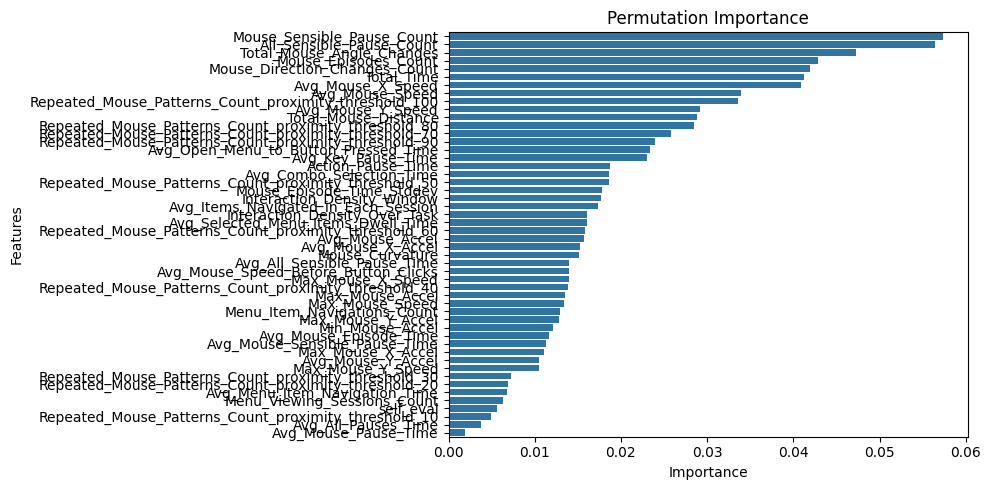

In [92]:
plt.figure(figsize=(10,5))
sns.barplot(x="Importance", y="Features",data = df_feature_importance, ci=None)
plt.title("Permutation Importance")
plt.tight_layout()

In [93]:
shap.initjs() # いくつかの可視化で必要
explainer = shap.TreeExplainer(rf, X_test)
shap_values = explainer.shap_values(X_test)
# SHAP値の確認
shap_values.shape

(66, 50)

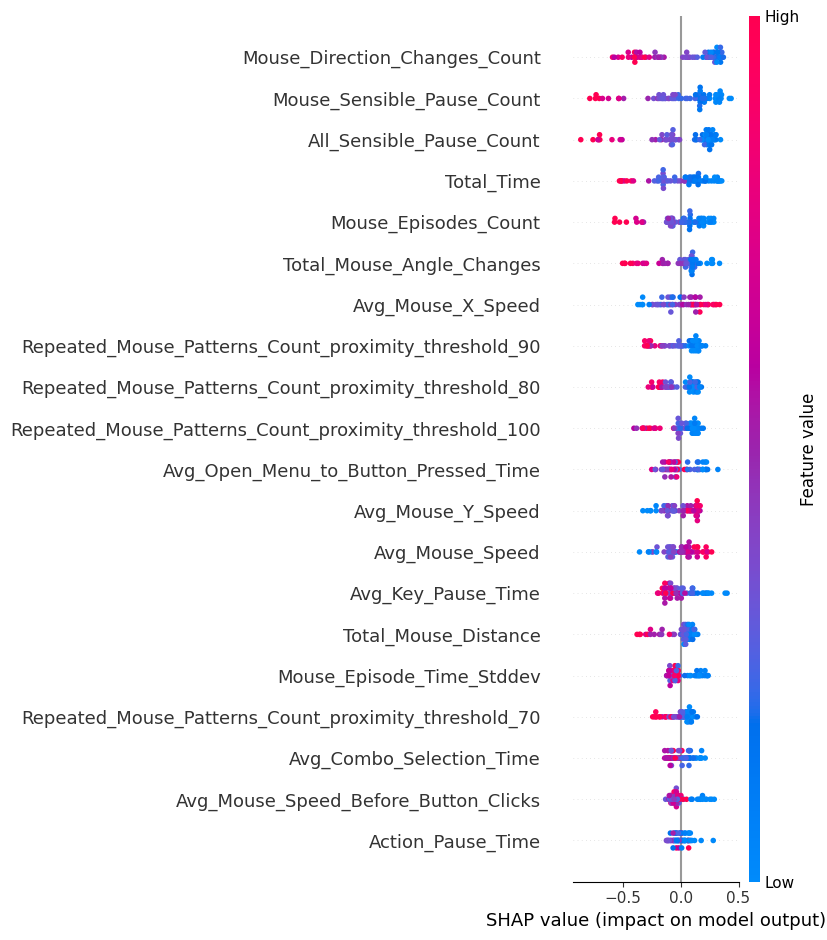

In [94]:
shap.summary_plot(shap_values, X_test)